<h1>Text Classsification Using Various Classifiers</h1>

1. **Search Engines**

  a. Whenever you search, it looks for keywords.<br>
  Example, "What is the **weather today**?"
  bold = keywords

  Keywords are decided on the basis of weights which are calculated using:<br>
    i. TF - Term Frequency<pre>
    TF = No. of occurrence of type/Tot no. of words</pre>
    ii. IDF - Inverse Document Frequency<pre>
    IDF = log(no. of sentences/No. of sentences containing that word)</pre>
  Now multiply TF and IDF(called TF-IDF) - This will be the weight to be considered.

  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf= tfidf_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.55      0.50        94
    positive       0.52      0.43      0.47       106

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.49       200



Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
Training Logistic Regression...
Evaluating Logistic Regression...
Training Support Vector Machine...
Evaluating Support Vector Machine...
Training Random Forest...
Evaluating Random Forest...

Multinomial Naive Bayes:
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.55      0.50        94
    positive       0.52      0.43      0.47       106

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.49       200

Confusion Matrix:
[[52 42]
 [60 46]]


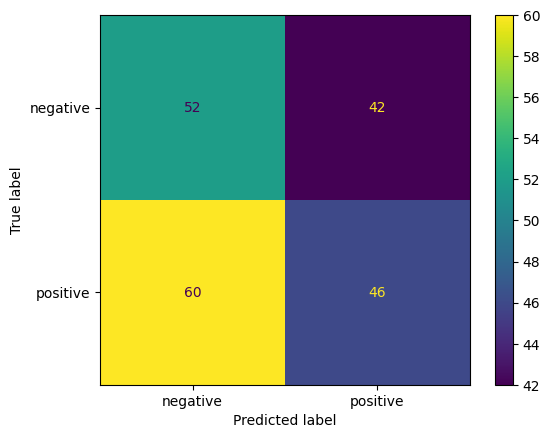


Logistic Regression:
Accuracy: 0.475
Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.45      0.44        94
    positive       0.50      0.50      0.50       106

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200

Confusion Matrix:
[[42 52]
 [53 53]]


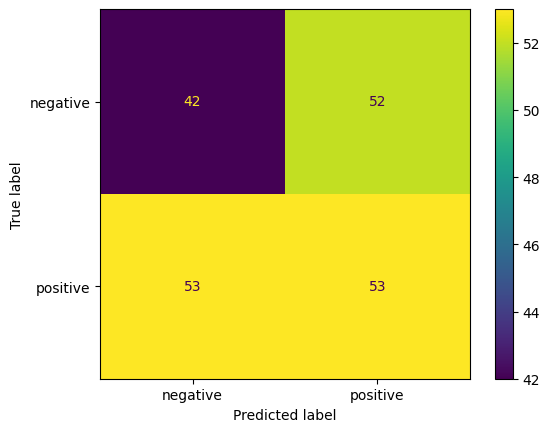


Support Vector Machine:
Accuracy: 0.475
Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.52      0.48        94
    positive       0.51      0.43      0.47       106

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200

Confusion Matrix:
[[49 45]
 [60 46]]


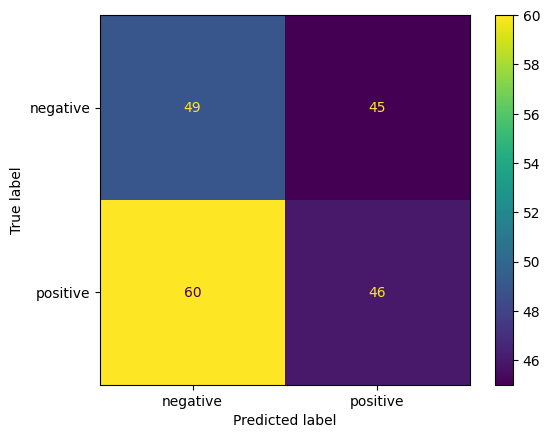


Random Forest:
Accuracy: 0.515
Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.53      0.51        94
    positive       0.55      0.50      0.52       106

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200

Confusion Matrix:
[[50 44]
 [53 53]]


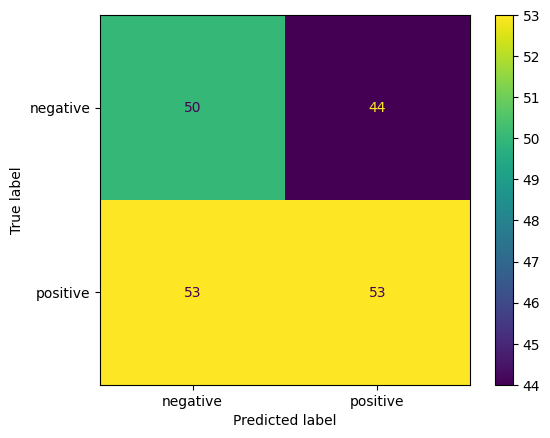

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklea rn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Preprocess the text data
def preprocess_text(text):
    return text

# Feature extraction using TF-IDF
def extract_features(train_texts, test_texts):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
    X_test_tfidf = tfidf_vectorizer.transform(test_texts)
    return X_train_tfidf, X_test_tfidf, tfidf_vectorizer

# Train a classifier
def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    return classifier

# Evaluate the classifier
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion_mat

# Main function to run the text classification pipeline
def main():
    # Load the dataset
    file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/dataset.csv'
    data = load_data(file_path)

    # Preprocess the text data
    data['text'] = data['text'].apply(preprocess_text)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

    # Feature extraction using TF-IDF
    X_train_tfidf, X_test_tfidf, tfidf_vectorizer = extract_features(X_train, X_test)

    # Initialize and train multiple classifiers
    classifiers = {
        "Multinomial Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(),
        "Support Vector Machine": SVC(),
        "Random Forest": RandomForestClassifier()
    }

    results = {}
    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name}...")
        clf = train_classifier(clf, X_train_tfidf, y_train)
        print(f"Evaluating {clf_name}...")
        accuracy, report, confusion_mat = evaluate_classifier(clf, X_test_tfidf, y_test)
        results[clf_name] = {"accuracy": accuracy, "report": report, "confusion_matrix": confusion_mat}

    # Print the results
    for clf_name, result in results.items():
        print(f"\n{clf_name}:")
        print("Accuracy:", result["accuracy"])
        print("Classification Report:")
        print(result["report"])
        print("Confusion Matrix:")
        print(result["confusion_matrix"])
        disp = ConfusionMatrixDisplay(confusion_matrix=result["confusion_matrix"] ,display_labels=clf.classes_)
        disp.plot()
        plt.show()

if __name__ == "__main__":
    main()